In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_norm = pd.read_csv("../data/df_normalized_encoded.csv")
df_norm

,semi_major_axis,eccentricity,inclination,longitude_node,perihelion,perihelion_distance,aphelion_distance,orbital_period,data_arc,n_obs_used,absolute_magnitude,diameter,albedo,min_orbit_intersection,mean_motion,mean_anomaly,near_earth_object_N,near_earth_object_Y,physical_hazardous_asteroid_N,physical_hazardous_asteroid_Y
0,-0.507630,0.249189,-0.373376,-1.188765,-1.433350,-0.762226,-0.302052,-0.147092,8.133003,3.468336,-4.631043,9.155872,1.037744,-0.763128,0.700901,1.230759,0.077199,-0.077199,0.03832,-0.03832
1,-0.514063,-1.010012,-0.785863,-1.013740,-0.206433,-0.274327,-0.498700,-0.148760,8.054713,4.426078,-3.952145,6.852597,1.046813,-0.333389,0.714139,0.061231,0.077199,-0.077199,0.03832,-0.03832
2,-0.715834,-0.780444,-0.101824,0.162283,-0.472614,-0.645042,-0.592504,-0.200239,7.783764,3.327287,-4.211499,8.294674,0.638693,-0.687464,1.163836,0.327977,0.077199,-0.077199,0.03832,-0.03832
3,-0.869666,-1.045657,-1.381633,-0.099080,0.667505,-0.765284,-0.726954,-0.238404,6.846989,3.889743,-3.372412,4.875320,0.194296,-0.788116,1.558003,0.431769,0.077199,-0.077199,0.03832,-0.03832
4,-0.293410,-1.454459,-0.567600,-1.274602,-0.482708,0.224671,-0.432387,-0.090671,7.273796,3.154894,-4.585274,8.851156,0.928912,0.207375,0.293646,-1.605449,0.077199,-0.077199,0.03832,-0.03832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135031,0.487911,3.698116,2.733234,-0.528194,-0.434328,-1.262373,1.063440,0.129259,-1.186582,-1.083547,2.279982,-1.001483,-0.132199,-1.190757,-0.783382,0.123108,0.077199,-0.077199,0.03832,-0.03832
135032,0.509019,0.178559,2.493306,1.355704,-1.565211,0.563773,0.380594,0.135496,-1.164394,-1.078323,0.754370,-0.296536,-0.993785,0.524668,-0.805944,-0.174407,0.077199,-0.077199,0.03832,-0.03832
135033,-0.353078,-0.899092,0.196511,0.744905,-0.113309,-0.092167,-0.379826,-0.106561,-0.997711,-1.107926,1.593457,-0.581266,-0.631012,-0.102536,0.400883,-0.364888,0.077199,-0.077199,0.03832,-0.03832
135034,0.343069,1.843813,0.620684,1.695298,1.552790,-0.471173,0.586359,0.086872,-1.194158,-1.118374,1.517176,-0.432023,-0.531250,-0.527820,-0.620914,-0.070754,0.077199,-0.077199,0.03832,-0.03832


In [19]:
df_main = pd.read_csv("../data/asteroid_cleaned.csv")
df_main

,semi_major_axis,eccentricity,inclination,longitude_node,perihelion,perihelion_distance,aphelion_distance,orbital_period_years,data_arc,n_obs_radar_total,absolute_magnitude,near_earth_object,potential_hazardous_asteroid,diameter,albedo,min_orbit_intersection,mean_motion,mean_anomaly
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,3.34,N,N,939.400,0.0900,1.594780,0.213885,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,4.13,N,N,545.000,0.1010,1.233240,0.213503,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,5.33,N,N,246.596,0.2140,1.034540,0.226019,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,3.20,N,N,525.400,0.4228,1.139480,0.271609,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,6.85,N,N,106.699,0.2740,1.095890,0.238632,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136000,3.155975,0.430349,28.718353,115.532995,136.849398,1.797805,4.514145,5.606716,2250.0,47,18.20,N,N,1.077,0.1160,0.854315,0.175794,195.737632
136001,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,50,16.20,N,N,3.793,0.0210,1.663010,0.174527,164.999439
136002,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,33,17.30,N,N,2.696,0.0610,1.367330,0.242270,145.319581
136003,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,27,17.20,N,N,3.271,0.0720,1.166840,0.184914,175.708508


In [35]:
df_main.columns = ['semi_major_axis', 'eccentricity', 'inclination', 'longitude_node',
       'perihelion', 'perihelion_distance', 'aphelion_distance',
       'orbital_period_years', 'data_arc', 'n_obs_radar_total',
       'absolute_magnitude', 'near_earth_object',
       'potential_hazardous_asteroid', 'albedo',
       'min_orbit_intersection', 'mean_motion', 'mean_anomaly',
       'diameter']

<Axes: >

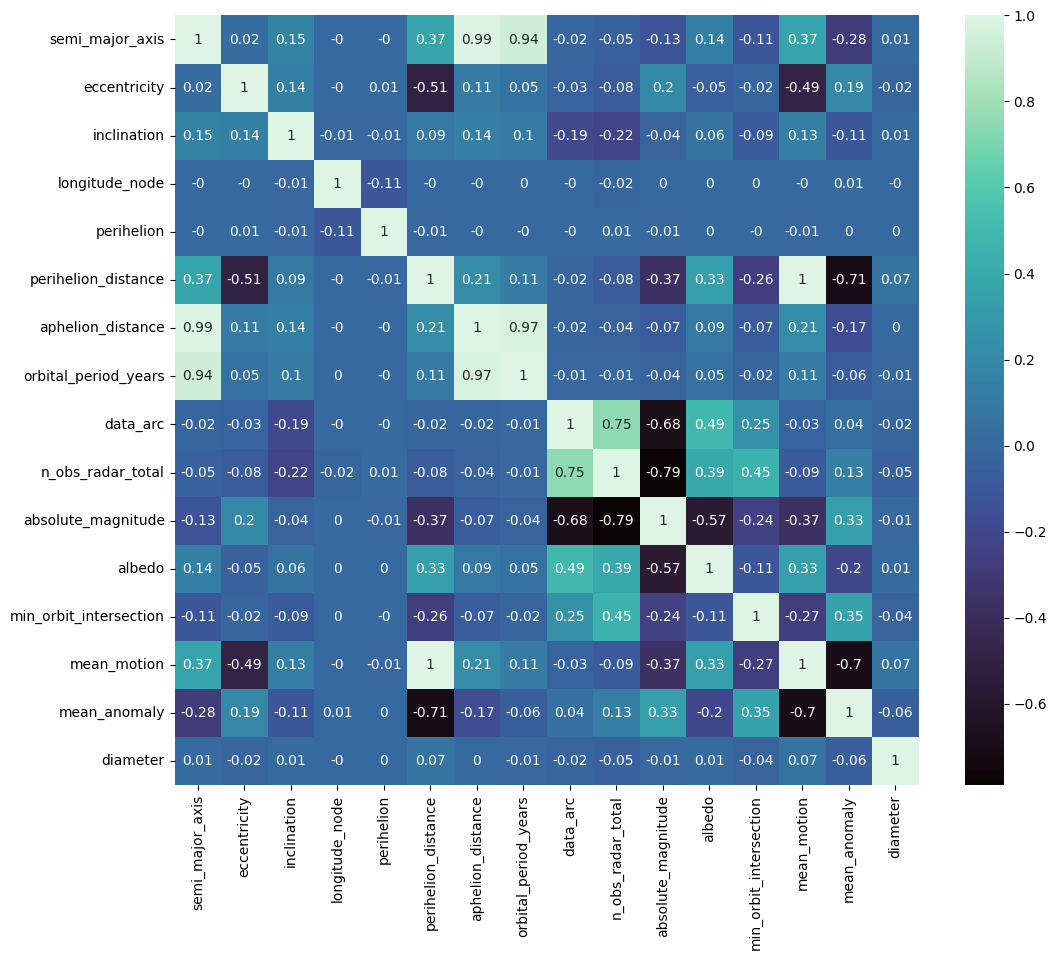

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(df_main.corr().round(decimals=2), annot=True, cmap='mako')